# Analysis
1. The average Urban Fare, regardless of city, is less than $30.00.
2. Rural rides are the most expensive,but there are less of them than suburban or urban.
3. Urban fares make up more than 62% of all fares by city type.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = ("../data/city_data.csv")
ride_data_to_load = ("../data/ride_data.csv")

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
combined_data_df = pd.merge(ride_data, city_data,
                                 how='left', on='city')

# Display the data table for preview
combined_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [3]:
#crate urban dataframe
urban_df = combined_data_df[combined_data_df["type"] == "Urban"]

#avg fare
ucity_grouped2 = urban_df.groupby(["city"])["fare"].mean()
#ucity_grouped2

#driver count
udrivers = urban_df.groupby(["city"])
udrivers = udrivers["driver_count"].mean()

#ride count
uride_counts = urban_df.groupby(["city"])["fare"].nunique()

#driver counts
#udriver = combined_data_df.groupby(["city", "type"])["driver_count"].mean() 


In [10]:
#create surburban dataframe
suburban_df = combined_data_df[combined_data_df["type"] == "Suburban"]

#avg fare
scity_grouped2 = suburban_df.groupby(["city"])["fare"].mean()
#ucity_grouped2

#driver count
sdrivers = urban_df.groupby(["city"])
sdrivers = sdrivers["driver_count"].mean()

sride_counts = suburban_df.groupby(["city"])["fare"].count()

#sride_counts = suburban_df.groupby(["city"])["fare"].nunique()

In [13]:
rural_df = combined_data_df[combined_data_df["type"] == "Rural"]

#avg fare
rcity_grouped2 = rural_df.groupby(["city"])["fare"].mean()
#ucity_grouped2

#driver count
rdrivers = urban_df.groupby(["city"])
rdrivers = rdrivers["driver_count"].mean()

rride_counts = rural_df.groupby(["city"])["fare"].nunique()

## Bubble Plot of Ride Sharing Data

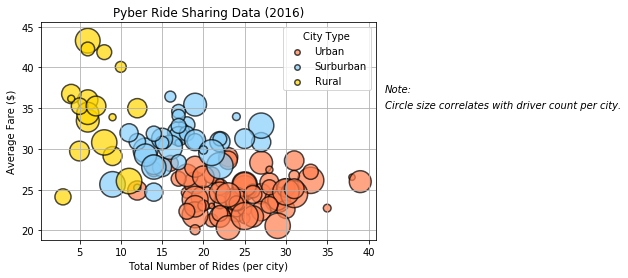

In [14]:
# Obtain the x and y coordinates for each of the three city types
x = np.arange(0, 41, 5)
y = np.arange(0, 41, 5)

# Build the scatter plots for each city types
plt.scatter(uride_counts, ucity_grouped2, label = "Urban", linewidth=1.5, marker="o", facecolors = "coral", edgecolors = "black", alpha = .7, s=udrivers*10)
plt.scatter(sride_counts, scity_grouped2, label = "Surburban", linewidth=1.5, marker="o", facecolors = "lightskyblue", edgecolors = "black", alpha = .7, s=udrivers*10)
plt.scatter(rride_counts, rcity_grouped2, label = "Rural", linewidth=1.5, marker="o", facecolors = "gold", edgecolors = "black", alpha = .7, s=udrivers*10)

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc="upper right", numpoints=1, title = "City Type", fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
t = "Note:"
t2 = "Circle size correlates with driver count per city."
plt.text(42, 35, t2, fontsize=10, style='oblique', ha='left')
plt.text(42, 37, t, fontsize=10, style='oblique', ha='left')

# Save Figure
plt.savefig("../Images/BubblePlot.png")

In [ ]:
# Show plot
plt.show()

## Total Fares by City Type

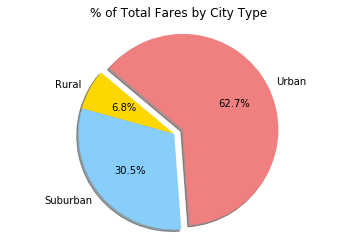

In [59]:
# Calculate Fare Percents
total_fare = combined_data_df["fare"].sum()
ride_total = combined_data_df[["type","fare"]].groupby(["type"]).sum()
percent = ride_total/total_fare
 
# # Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.title("% of Total Fares by City Type")
plt.axis("equal")
plt.savefig("../Images/FareByCityPies.png")
plt.show()

## Total Rides by City Type

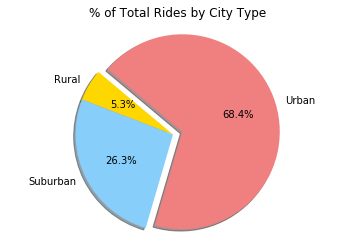

In [21]:
# Calculate Type Percents
rides = combined_data_df.groupby(["type"])["ride_id"].nunique()
total_rides = rides.sum()
total_type = rides / total_rides
total_type
 
# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
plt.pie(total_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.title("% of Total Rides by City Type")
plt.axis("equal")

#Save figure
plt.savefig("../Images/RidesByCityPies.png")
plt.show()

## Total Drivers by City Type

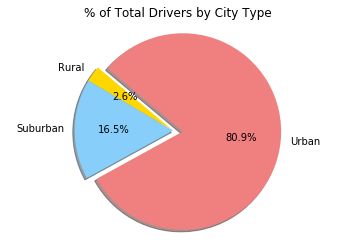

In [55]:
# Calculate Driver Percents
city_driver = city_data [["city","driver_count"]].groupby(["city"]).mean()
drivers = city_driver ["driver_count"].sum()
driver_type = city_data[["type","city", "driver_count"]].groupby(["type","city"]).min()
type_driver = driver_type.groupby(["type"]).sum()
percent = type_driver/drivers
#percent

#plot pie chart
colors = ["gold", "lightskyblue", "lightcoral"]
labels = ["Rural", "Suburban", "Urban"]
explode = (0, 0, .1)
plt.pie(percent, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140);
plt.title("% of Total Drivers by City Type")
plt.axis("equal")

#Save figure
plt.savefig("../Images/RidesByCityPies.png")
plt.show()

In [45]:
# Show Figure
plt.show()